<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Regressão
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)<br>
Aluno [Rafael Barbosa](https://www.linkedin.com/in/barbosa89/)


---

# **Tópicos**

<ol type="1">
  <li>Regressão;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever o peso do penguin (**body_mass_g**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
penguim = sns.load_dataset('penguins')

In [ ]:
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### **1.1. Analise exploratoria**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos por sexo:

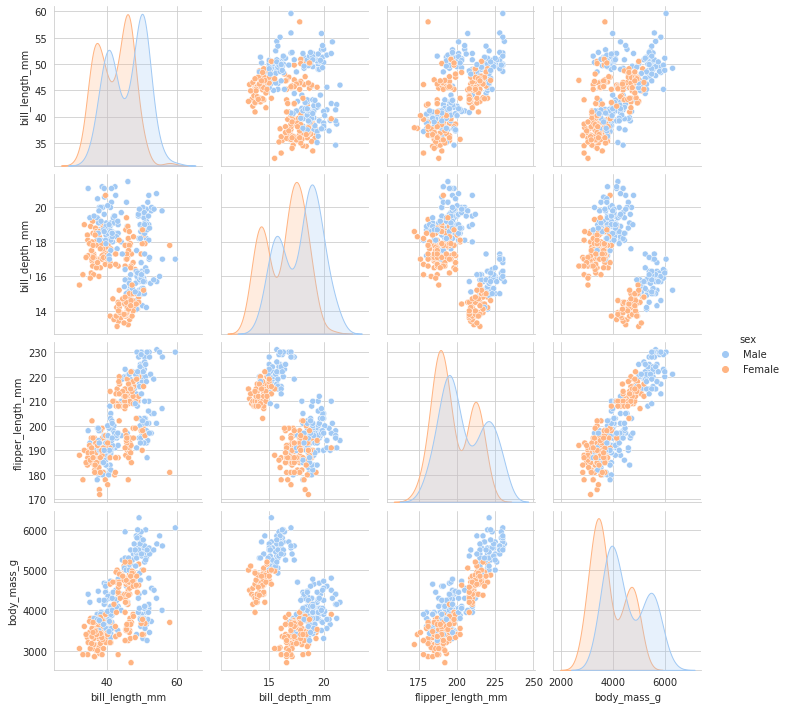

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="sex", palette="pastel")

**Comentário:** Aparente relação direta entre o sexo e as dimenções e pinguins fêmeas tendem a apresentar dimensões menores comparadas aos indivíduos machos.

 - Atributos por espécie:

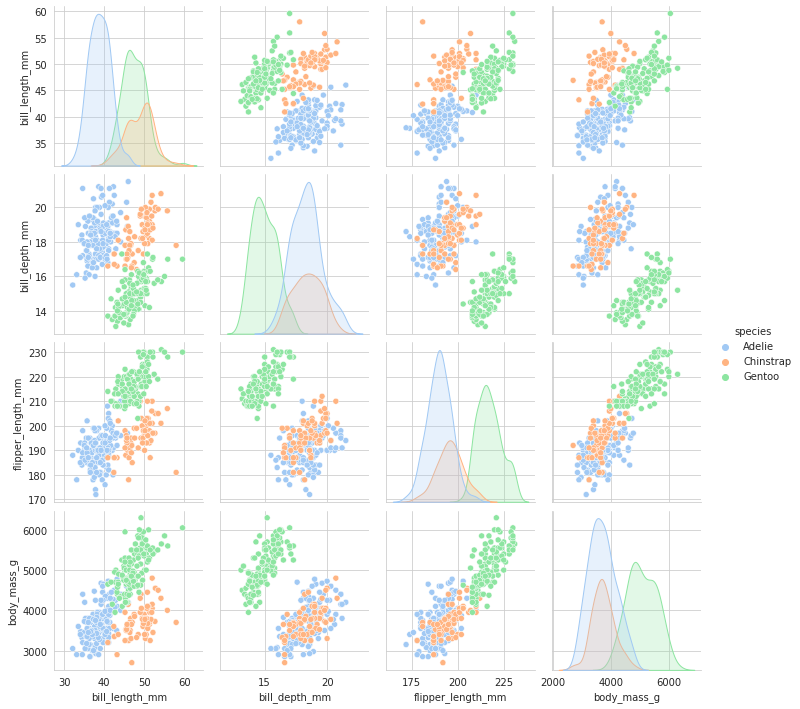

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="species", palette="pastel")

**Comentário:** Aparente relação direta entre o espécie e as dimenções e pinguins Adelie tendem a apresentar dimensões menores comparadas à indivíduos das demais espécies.

 - Atributos por ilha:

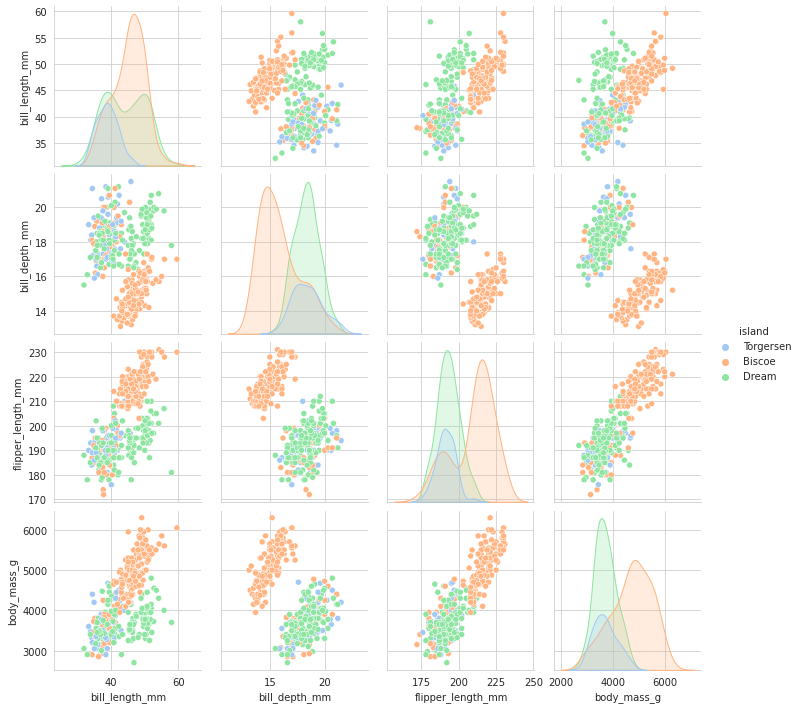

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="island", palette="pastel")

**Comentário:** Aparente relação direta entre ilhas e as dimenções e pinguins de Biscoe tendem a apresentar dimensões mais específicas comparadas à indivíduos das demais ilhas.

## 2\. Dados

### **2.1. Valores nulos**

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [93]:
# resposta da questão 2.1

import seaborn as sns
import pandas as pd
import numpy as np

# Carregar o conjunto de dados
df = sns.load_dataset('penguins')
df.info()
print("\n")

# 1 - descarta dados faltantes e nulos
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_leng

### **2.2. Variáveis numéricas**

Identifique as variáveis numéricas e crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [94]:
# resposta da questão 2.2

# 2 - Variáveis numéricas
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove('body_mass_g')  # Remover a variável resposta
for col in numeric_cols:
    df[col + '_std'] = (df[col] - df[col].mean()) / df[col].std()

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-0.894695,0.779559,-1.424608
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-0.821552,0.119404,-1.067867
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,-0.675264,0.424091,-0.425733
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,-1.333559,1.084246,-0.568429
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,-0.858123,1.744400,-0.782474


### **2.3. Variáveis categóricas**

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

In [95]:
# resposta da questão 2.3

# 3 - Variáveis categóricas
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    dummies = pd.get_dummies(df[col], prefix=col)
    dummies.columns = [name + '_nom' for name in dummies.columns]  # Adicionar sufixo '_nom'
    df = pd.concat([df, dummies], axis=1)

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,species_Adelie_nom,species_Chinstrap_nom,species_Gentoo_nom,island_Biscoe_nom,island_Dream_nom,island_Torgersen_nom,sex_Female_nom,sex_Male_nom
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-0.894695,0.779559,-1.424608,1,0,0,0,0,1,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-0.821552,0.119404,-1.067867,1,0,0,0,0,1,1,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,-0.675264,0.424091,-0.425733,1,0,0,0,0,1,1,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,-1.333559,1.084246,-0.568429,1,0,0,0,0,1,1,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,-0.858123,1.744400,-0.782474,1,0,0,0,0,1,0,1


### **2.4. Limpeza**

Descarte as colunas originais e mantenha apenas a variável resposta e as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*".

In [96]:
# resposta da questão 2.4

bill_length_media = df['bill_length_mm'].mean()
bill_length_desvio_padrao = df['bill_length_mm'].std()

bill_depth_media = df['bill_depth_mm'].mean()
bill_depth_desvio_padrao = df['bill_depth_mm'].std()

flipper_length_media = df['flipper_length_mm'].mean()
flipper_length_desvio_padrao = df['flipper_length_mm'].std()

# 4 - Limpeza
df = df[['body_mass_g'] + [col + '_std' for col in numeric_cols] + [col for col in df.columns if col.endswith('_nom') or col.endswith('_ord')]]

df.head()

,body_mass_g,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,species_Adelie_nom,species_Chinstrap_nom,species_Gentoo_nom,island_Biscoe_nom,island_Dream_nom,island_Torgersen_nom,sex_Female_nom,sex_Male_nom
0,3750.0,-0.894695,0.779559,-1.424608,1,0,0,0,0,1,0,1
1,3800.0,-0.821552,0.119404,-1.067867,1,0,0,0,0,1,1,0
2,3250.0,-0.675264,0.424091,-0.425733,1,0,0,0,0,1,1,0
4,3450.0,-1.333559,1.084246,-0.568429,1,0,0,0,0,1,1,0
5,3650.0,-0.858123,1.744400,-0.782474,1,0,0,0,0,1,0,1


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   body_mass_g            333 non-null    float64
 1   bill_length_mm_std     333 non-null    float64
 2   bill_depth_mm_std      333 non-null    float64
 3   flipper_length_mm_std  333 non-null    float64
 4   species_Adelie_nom     333 non-null    uint8  
 5   species_Chinstrap_nom  333 non-null    uint8  
 6   species_Gentoo_nom     333 non-null    uint8  
 7   island_Biscoe_nom      333 non-null    uint8  
 8   island_Dream_nom       333 non-null    uint8  
 9   island_Torgersen_nom   333 non-null    uint8  
 10  sex_Female_nom         333 non-null    uint8  
 11  sex_Male_nom           333 non-null    uint8  
dtypes: float64(4), uint8(8)
memory usage: 15.6 KB


### **2.5. Treino/Teste**

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes.

In [98]:
# resposta da questão 2.5

# 5 -
from sklearn.model_selection import train_test_split

# Definir a variável resposta e as variáveis preditivas
X = df.drop('body_mass_g', axis=1)
y = df['body_mass_g']

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=123)


In [99]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 267 to 331
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bill_length_mm_std     222 non-null    float64
 1   bill_depth_mm_std      222 non-null    float64
 2   flipper_length_mm_std  222 non-null    float64
 3   species_Adelie_nom     222 non-null    uint8  
 4   species_Chinstrap_nom  222 non-null    uint8  
 5   species_Gentoo_nom     222 non-null    uint8  
 6   island_Biscoe_nom      222 non-null    uint8  
 7   island_Dream_nom       222 non-null    uint8  
 8   island_Torgersen_nom   222 non-null    uint8  
 9   sex_Female_nom         222 non-null    uint8  
 10  sex_Male_nom           222 non-null    uint8  
dtypes: float64(3), uint8(8)
memory usage: 8.7 KB


In [100]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 111 to 84
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bill_length_mm_std     111 non-null    float64
 1   bill_depth_mm_std      111 non-null    float64
 2   flipper_length_mm_std  111 non-null    float64
 3   species_Adelie_nom     111 non-null    uint8  
 4   species_Chinstrap_nom  111 non-null    uint8  
 5   species_Gentoo_nom     111 non-null    uint8  
 6   island_Biscoe_nom      111 non-null    uint8  
 7   island_Dream_nom       111 non-null    uint8  
 8   island_Torgersen_nom   111 non-null    uint8  
 9   sex_Female_nom         111 non-null    uint8  
 10  sex_Male_nom           111 non-null    uint8  
dtypes: float64(3), uint8(8)
memory usage: 4.3 KB


In [101]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 222 entries, 267 to 331
Series name: body_mass_g
Non-Null Count  Dtype  
--------------  -----  
222 non-null    float64
dtypes: float64(1)
memory usage: 3.5 KB


In [102]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 111 entries, 111 to 84
Series name: body_mass_g
Non-Null Count  Dtype  
--------------  -----  
111 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


## 3\. Modelagem

### **3.1. Treino**

Treine um modelo de **regressão linear** com os **dados de treino** (2/3).

In [103]:
# resposta da questão 3.1

from sklearn.linear_model import LinearRegression

# Criar uma instância do modelo
model = LinearRegression()

# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)


LinearRegression()

In [104]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bill_length_mm_std', 'bill_depth_mm_std', 'flipper_length_mm_std',
        'species_Adelie_nom', 'species_Chinstrap_nom',
        'species_Gentoo_nom', 'island_Biscoe_nom', 'island_Dream_nom',
        'island_Torgersen_nom', 'sex_Female_nom', 'sex_Male_nom'],
       dtype=object),
 'n_features_in_': 11,
 'coef_': array([ 132.78649901,  156.71902304,  214.9154453 , -224.0625651 ,
        -540.75218971,  764.81475481,   20.90782822,   37.33834722,
         -58.24617544, -184.05993697,  184.05993697]),
 'rank_': 8,
 'singular_': array([2.39357246e+01, 1.54051746e+01, 1.09522472e+01, 6.04819660e+00,
        5.72605751e+00, 5.21791216e+00, 3.23132984e+00, 2.08258676e+00,
        1.81092791e-15, 1.29215916e-15, 8.74643300e-16]),
 'intercept_': 4114.9847089839695}

### **3.2. Avaliação**

Calcule o **RMSE** para o modelo de **regressão linear** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui um RMSE de approx. 296g, 7% da média do peso, uma performance razoável (seu RMSE pode não ser igual).

In [105]:
# resposta da questão 3.2

from sklearn.metrics import mean_squared_error

# Prever os valores de 'body_mass_g' para os dados de teste
y_pred = model.predict(X_test)

# Calcular o RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('RMSE: ', rmse)


RMSE:  294.8247050622416


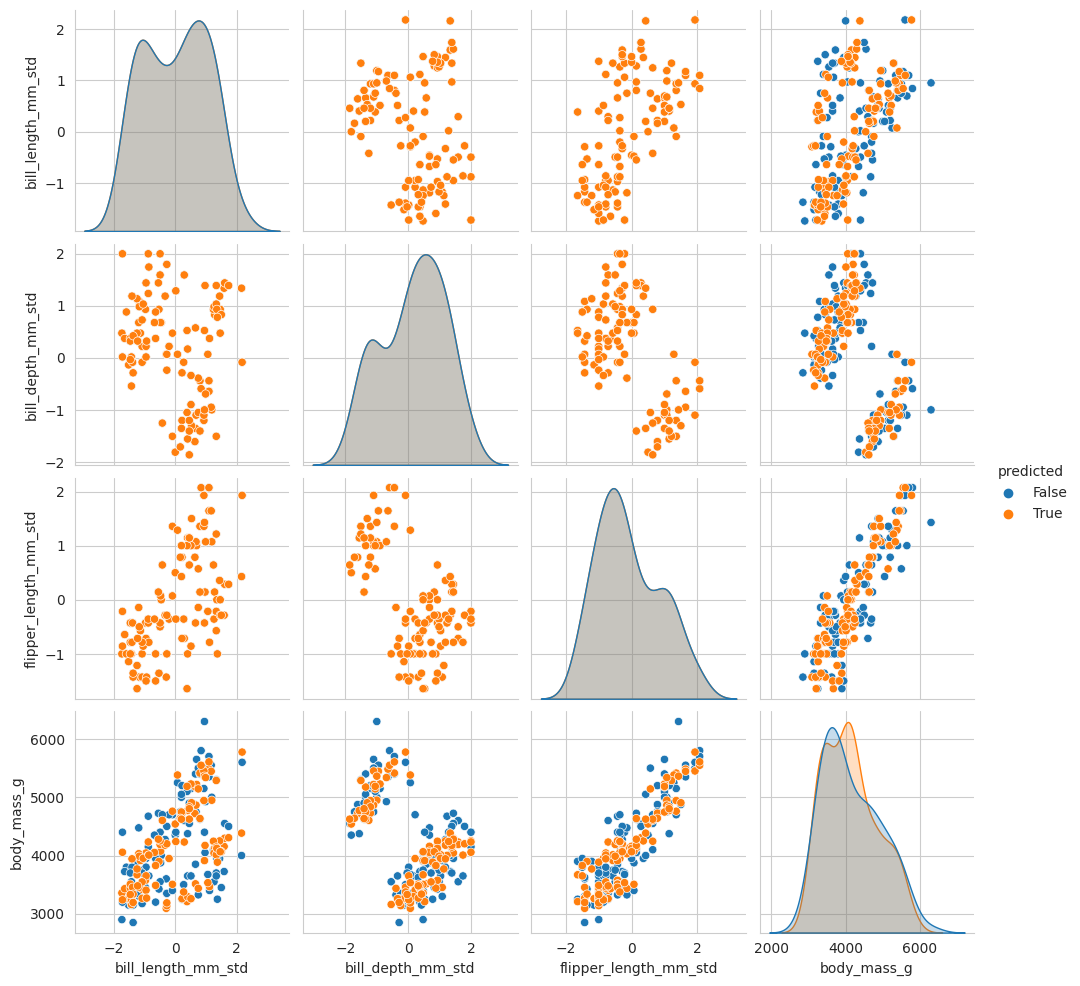

In [106]:

test_data = pd.concat([X_test, pd.DataFrame(y_test, columns=['body_mass_g'])], axis=1).reset_index(drop=True)
test_data['predicted'] = False
prediction_data = pd.concat([X_test.reset_index(drop=True), pd.DataFrame(y_pred, columns=['body_mass_g'])], axis=1).reset_index(drop=True)
prediction_data['predicted'] = True
prediction = pd.concat([test_data, prediction_data]).reset_index(drop=True)

prediction = prediction.drop(['species_Adelie_nom', 'species_Chinstrap_nom',
        'species_Gentoo_nom', 'island_Biscoe_nom', 'island_Dream_nom',
        'island_Torgersen_nom', 'sex_Female_nom', 'sex_Male_nom'], axis=1)

with sns.axes_style('whitegrid'):

  sns.pairplot(data=prediction, hue='predicted')

## 4\. Predição  

### **4.1. Novo penguim**

Qual o peso de um penguim com as seguintes características:


| species	| island | bill_length_mm | bill_depth_mm | flipper_length_mm | sex |
| --- | --- | --- | --- | --- | --- |
| Adelie | Biscoe | 38.2 | 18.1 | 185.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2 e 2.3

> **Nota:** Como referência eu obtive um peso predito de 3786.16g (a sua predição pode não ser igual).

In [110]:
# resposta da questão 4.1

# Criar um DataFrame com as características dadas
penguin = pd.DataFrame({
    'species': ['Adelie'],
    'island': ['Biscoe'],
    'bill_length_mm': [38.2],
    'bill_depth_mm': [18.1],
    'flipper_length_mm': [185.0],
    'sex': ['Male']
})

# padronizar dados

penguin_bill_length_mm_std = (penguin['bill_length_mm'] - bill_length_media) / bill_length_desvio_padrao
penguin_bill_depth_mm_std = (penguin['bill_depth_mm'] - bill_depth_media) / bill_depth_desvio_padrao
penguin_flipper_length_mm_std = (penguin['flipper_length_mm'] - flipper_length_media) / flipper_length_desvio_padrao

# data = np.array(['bill_length_mm_std', 'bill_depth_mm_std', 'flipper_length_mm_std',
        # 'species_Adelie_nom', 'species_Chinstrap_nom',
        # 'species_Gentoo_nom', 'island_Biscoe_nom', 'island_Dream_nom',
        # 'island_Torgersen_nom', 'sex_Female_nom', 'sex_Male_nom'])

data = np.array([penguin_bill_length_mm_std, penguin_bill_depth_mm_std, penguin_flipper_length_mm_std,1,0,0,1,0,0,0,1])

# Prever o peso do pinguim
predicted_weight = model.predict(data.reshape(1, -1))
predicted_weight

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3784.81989204])

In [118]:
print('Peso previsto:', round(float(predicted_weight),2), 'g')

Peso previsto: 3784.82 g


---